In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"

# master_file input
-> 44584 rows, 290 cols, original dataset  
  -> 35000 rows 218 cols 

In [ ]:
master_file = pd.read_csv(BASE_PATH + 'Hyper_master_file_v4.csv', index_col=0)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44584 entries, 0 to 44583
Columns: 290 entries, SEQN to Hyper
dtypes: float64(290)
memory usage: 99.0 MB


# Data Cleaning
- remove missing values > 10000 in each columns (missing over 20% in each columns) 
  - -> 203 columns remine
- remove missing values >= 20 in each row (missing over 10% in each columns)


In [ ]:
# check_list = []

# for col in master_file:
#     n = master_file[col].value_counts().reset_index()
#     if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] == 1):
#       check_list.append(col)
# print(check_list)


In [ ]:
# master_file['Told_High_blood_pressure_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Told_High_blood_pressure_dummy'].value_counts().reset_index().iloc[-1,-1]

## Check there is only 1 data in the category (mannually decide whether replace with na)

In [ ]:
# master_file['Taking_insulin_now_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Taking_insulin_now_1_dummy'].replace({7: np.nan, 9:np.nan}, inplace = True)

In [ ]:
# master_file['Vigorous_work_activity_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Vigorous_work_activity_1_dummy'].replace({7: np.nan}, inplace = True)

In [ ]:
# master_file['Moderate work activity_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Moderate work activity_1_dummy'].replace({7: np.nan}, inplace = True)

In [ ]:
# master_file['DR2_300'].value_counts().reset_index()

In [ ]:
# master_file['DR2_300'].replace({7: np.nan}, inplace = True)

In [ ]:
replace_dict = {}

dummy_col = []
for col in master_file.columns:
  if 'dummy' in col:
    dummy_col.append(col)

check_list = []

for col in dummy_col:
  values = master_file[col].value_counts(dropna=True).keys().tolist()
  counts = master_file[col].value_counts(dropna=True).tolist()
  valid = [i for i,v in enumerate(counts) if v < 10]
  c = len(valid)
  if c > 0:
    value_dict = dict(zip(values[-c:], counts[-c:]))
    replace_dict[col] = value_dict

In [ ]:
replace_dict

{'>100_cigarettes_inlife_1_dummy': {7.0: 6},
 'Country_of_birth_dummy': {77.0: 7, 99.0: 4},
 'Moderate work activity_1_dummy': {7.0: 2},
 'Moderate_recreational_activities_1_dummy': {7.0: 1, 9.0: 7},
 'Taking_insulin_now_1_dummy': {7.0: 2, 9.0: 5},
 'Vigorous_recreational_activities_1_dummy': {7.0: 1, 9.0: 5},
 'Vigorous_work_activity_1_dummy': {7.0: 2},
 'Walk_or_bicycle_1_dummy': {7.0: 1, 9.0: 3},
 'had_trouble_sleeping_1_dummy': {7.0: 2},
 'have_asthma_1_dummy': {7.0: 1},
 'have_diabetes_1_dummy': {7.0: 1},
 'have_prediabetes_1_dummy': {7.0: 1},
 'milk_product_consumption_freq_dummy': {7.0: 2, 9.0: 3},
 'milk_type_dummy': {77.0: 1}}

In [ ]:
master_file['>100_cigarettes_inlife_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['Country_of_birth_dummy'].replace({77.0: np.nan, 99.0:np.nan}, inplace = True)
master_file['Moderate work activity_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['Moderate_recreational_activities_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Taking_insulin_now_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Vigorous_recreational_activities_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Vigorous_work_activity_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Walk_or_bicycle_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['had_trouble_sleeping_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_asthma_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_diabetes_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_prediabetes_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['milk_product_consumption_freq_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['milk_type_dummy'].replace({77.0: np.nan}, inplace = True)


In [ ]:
check_list = []

for col in dummy_col:
  n = master_file[col].value_counts().reset_index()
  if n.shape[0] < 50 and (n.iloc[-1,1] < 10):
    check_list.append(col)

print(check_list)

[]


In [ ]:
check_list = []

for col in master_file:
    n = master_file[col].value_counts().reset_index()
    if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] < 10):
      check_list.append(col)
print(check_list)

['DR1TWS_x', 'DRD350JQ', 'DRD350K', 'DRD370GQ', 'DR2_300', 'DR2TWS', 'DR2MRESP', 'DR2HELP']


In [ ]:
master_file['DR2_300'].value_counts(dropna = False)

2.0    28501
NaN     8622
3.0     4954
1.0     2293
9.0      212
7.0        2
Name: DR2_300, dtype: int64

In [ ]:
master_file['DR2_300'].replace({7: np.nan}, inplace = True)

In [ ]:
master_file['DR2HELP'].value_counts(dropna = False)

NaN     33559
12.0    10070
4.0       363
1.0       357
5.0       159
6.0        29
11.0       24
8.0        11
7.0        10
10.0        2
Name: DR2HELP, dtype: int64

In [ ]:
# master_file['Walk_or_bicycle_1_dummy'].value_counts()

## remove missing values > 10000 in each columns 

In [ ]:
# remove columns
col_list=list(master_file)
out_list=[]
for col_name in col_list:
  num = master_file[col_name].isnull().sum(axis=0)
  if num > 10000:
    out_list.append(col_name)

master_file=master_file.drop(columns=out_list)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44584 entries, 0 to 44583
Columns: 203 entries, SEQN to Hyper
dtypes: float64(203)
memory usage: 69.4 MB


## remove missing values >= 20 in each row 
（less than 10% is missing)

In [ ]:
master_file['na_count'] = master_file.isnull().sum(axis=1)

In [ ]:
master_file[master_file['na_count'] < 20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35779 entries, 0 to 44583
Columns: 204 entries, SEQN to na_count
dtypes: float64(203), int64(1)
memory usage: 56.0 MB


In [ ]:
# remove rows
master_file = master_file[master_file['na_count'] < 20]

In [ ]:
master_file.drop(columns = {'na_count'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
master_file['Told_High_blood_pressure_dummy'].value_counts()

0.0    25761
1.0    10018
Name: Told_High_blood_pressure_dummy, dtype: int64

In [ ]:
master_file[master_file['Told_High_blood_pressure_dummy'] == 0]['Hyper'].value_counts()

0.0    21127
1.0     4634
Name: Hyper, dtype: int64

In [ ]:
master_file[master_file['Told_High_blood_pressure_dummy'] == 1]['Hyper'].value_counts()

1.0    8981
0.0    1037
Name: Hyper, dtype: int64

# Data Visulation

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '10-19', '20-29','30-39', '40-49', '50-59', '60-69', '70+']
master_file['agerange'] = pd.cut(master_file.age, bins, labels = labels,include_lowest = True)


In [ ]:
master_file.columns

Index(['SEQN', 'Told_High_blood_pressure_dummy', 'gender_dummy', 'age',
       'race_dummy', 'Household_reference_education_dummy', 'Education_dummy',
       'Income_dummy', 'Poverty_dummy', 'Country_of_birth_dummy',
       ...
       'DR2TP204', 'DR2TP205', 'DR2TP225', 'DR2TP226', 'DR2_300', 'DR2_320Z',
       'DR2_330Z', 'DR2BWATZ', 'Hyper', 'agerange'],
      dtype='object', length=204)

In [ ]:
visu_file_1 = master_file.loc[:,['Hyper','age','agerange']]

In [ ]:
visu_file_1.head()

,Hyper,age,agerange
0,1.0,62.0,60-69
1,1.0,71.0,70+
2,0.0,52.0,50-59
3,0.0,21.0,20-29
4,1.0,64.0,60-69


In [ ]:
visu_file_1 = master_file.loc[:,['Hyper','agerange']]

In [ ]:
grouped_multiple = visu_file_1.groupby(['Hyper', 'agerange']).agg({'Hyper': ['count']})


In [ ]:
grouped_multiple

Hyper
               count
Hyper agerange      
0.0   0-10      2535
      10-19     6989
      20-29     3532
      30-39     3107
      40-49     2447
      50-59     1716
      60-69     1125
      70+        713
1.0   0-10         9
      10-19      288
      20-29      588
      30-39     1213
      40-49     1949
      50-59     2809
      60-69     3318
      70+       3441

In [ ]:
grp_df = visu_file_1.groupby('agerange').sum()
grp_df = grp_df.assign(total=visu_file_1.groupby('agerange').count())
grp_df['Hyper%'] = grp_df.Hyper/grp_df.total * 100
grp_df.reset_index(drop=False, inplace=True)

In [ ]:
# Wanted palette details
from matplotlib import colors as mcolors

enmax_palette = ["#73C5CA", "#CD3D3F", "#E8A73A", "#201E61"]
color_codes_wanted = ['green_f', 'red_f', 'orange_f', 'blue_f']

cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))

mcolors.get_named_colors_mapping().update(cdict)


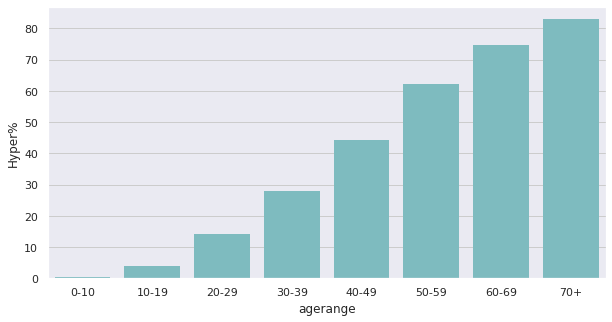

In [ ]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1)
sns.set_style({ 'grid.color': '.8', 'font.family':'Exo', 'patch.edgecolor': "none"})
#sns.set_theme()
sns.barplot(x="agerange", y="Hyper%", data=grp_df, color = 'green_f')

In [ ]:
len(list(X_train_try))

NameError: ignored

In [ ]:
# sns.set(rc={'figure.figsize':(10,5)}, font_scale=1)
# sns.set_style({'axes.facecolor':'grey', 'grid.color': '.8', 'font.family':'Times New Roman'})

# sns.barplot(x="agerange", y="Hyper%", data=grp_df, color = 'green_f')

In [ ]:
# fig = px.bar(grp_df, y='Hyper%', x='agerange', orientation='v', barmode='group')
# fig.show()

In [ ]:
grp_df

,agerange,Hyper,total,Hyper%
0,0-10,9.0,2544,0.353774
1,10-19,288.0,7277,3.957675
2,20-29,588.0,4120,14.271845
3,30-39,1213.0,4320,28.078704
4,40-49,1949.0,4396,44.335760
5,50-59,2809.0,4525,62.077348
6,60-69,3318.0,4443,74.679271
7,70+,3441.0,4154,82.835821


In [ ]:
grp_df.assign(total=visu_file_1.groupby('agerange').count())

,agerange,Hyper,total,Hyper%
0,0-10,9.0,NaN,0.353774
1,10-19,288.0,NaN,3.957675
2,20-29,588.0,NaN,14.271845
3,30-39,1213.0,NaN,28.078704
4,40-49,1949.0,NaN,44.335760
5,50-59,2809.0,NaN,62.077348
6,60-69,3318.0,NaN,74.679271
7,70+,3441.0,NaN,82.835821


In [ ]:
import plotly.express as px


In [ ]:
# travel_grp_df = box_df.groupby('agerange').sum()
# travel_grp_df = travel_grp_df.assign(games=box_df.groupby(travel_cats)['minutes_played'].count())
# travel_grp_df['WIN%'] = travel_grp_df.win/travel_grp_df.games * 100
# travel_grp_df.reset_index(drop=False, inplace=True)
# travel_grp_df = travel_grp_df.assign(travelled=travel_grp_df.travelled.astype(str))
# fig = px.bar(travel_grp_df, y='rest_cats', x='WIN%', orientation='h', color='travelled', barmode='group')
# fig.show()

In [ ]:
# values = [1, 10, 100]

# plt.figure(figsize=(9, 3))

# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(names, values)
# plt.subplot(133)
# plt.plot(names, values)
# plt.suptitle('Categorical Plotting')
# plt.show()

In [ ]:
# master_file['Hyper','agerange'].groupby('agerange').plot(kind='kde', ax=plt.gca())

In [ ]:
# list(master_file)

In [ ]:
master_hyper_0=master_file[master_file['Hyper']==0]
master_hyper_1=master_file[master_file['Hyper']==1]

In [ ]:
bmi_count0=pd.DataFrame(master_hyper_0['BMI'].value_counts())
bmi_count1=pd.DataFrame(master_hyper_1['BMI'].value_counts())
bmi_count0=bmi_count0.reset_index()
cols=['BMI','Count']
bmi_count0.columns=cols

bmi_count1=bmi_count1.reset_index()
cols=['BMI','Count']
bmi_count1.columns=cols
bmi_count1

,BMI,Count
0,27.90,81
1,26.60,73
2,28.20,70
3,27.60,67
4,31.20,67
...,...,...
2331,38.36,1
2332,44.48,1
2333,20.29,1
2334,25.93,1


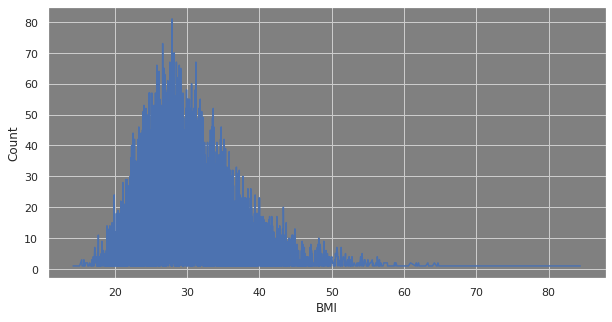

In [ ]:
sns.lineplot(data=bmi_count1, x="BMI", y="Count",color='b')
#sns.lineplot(data=bmi_count1, x="BMI", y="Count")


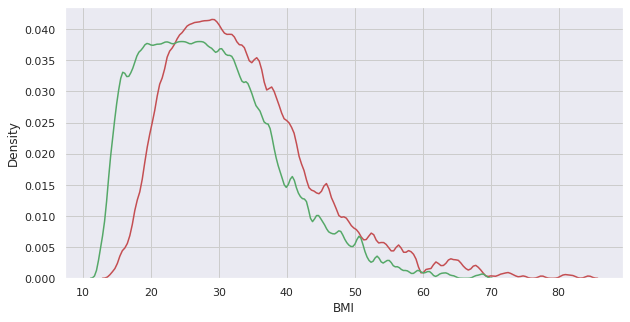

In [ ]:
sns.kdeplot(data=bmi_count1, x="BMI", bw_adjust=.2,color='r')
sns.kdeplot(data=bmi_count0, x="BMI", bw_adjust=.2,color='g')

In [ ]:
master_file['gender_dummy'].value_counts()
master_gender=master_file
master_gender.loc[(master_gender['gender_dummy']==1),'gender']="Male"
master_gender.loc[(master_gender['gender_dummy']==2),'gender']="Female"

In [ ]:
18445+17334

35779

In [ ]:
visu_file_1 = master_file.loc[:,['Hyper','gender_dummy']]
gender_df = visu_file_1.groupby('gender_dummy').sum()
gender_df = gender_df.assign(total=visu_file_1.groupby('gender_dummy').count())
gender_df['Hyper%'] = gender_df.Hyper/gender_df.total * 100
gender_df.reset_index(drop=False, inplace=True)

In [ ]:
gender_df

,gender_dummy,Hyper,total,Hyper%
0,1.0,6973.0,17334,40.227299
1,2.0,6642.0,18445,36.009759


In [ ]:
gender_df=master_gender['gender'].value_counts()
gender_df=gender_df.reset_index()
cols=['Gender','gender_count']
gender_df.columns=cols
gender_df['Hyper%']=gender_df['gender_count']/ *100
gender_df

,Gender,gender_count,Hyper%
0,Female,18445,51.552587
1,Male,17334,48.447413


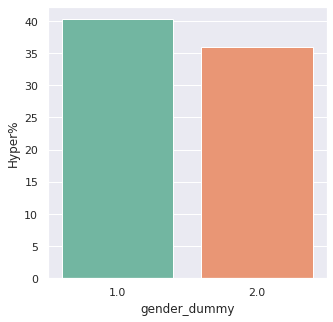

In [ ]:
sns.color_palette("hls", 8)
sns.color_palette("Set2")
sns.set(rc={'figure.figsize':(5,5)}, font_scale=1)
sns.barplot(data=gender_df,x='gender_dummy',y='Hyper%',palette="Set2")

In [ ]:
master_file['race_dummy'].value_counts()

3.0    14030
4.0     8046
1.0     5915
5.0     4070
2.0     3718
Name: race_dummy, dtype: int64

In [ ]:
# #master = visu_file_1.groupby('agerange').sum()
# grp_df = grp_df.assign(total=visu_file_1.groupby('agerange').count())
# grp_df['Hyper%'] = grp_df.Hyper/grp_df.total * 100
# #grp_df.reset_index(drop=False, inplace=True)

In [ ]:
visu_file_1 = master_file.loc[:,['Hyper','race_dummy']]
gender_df = visu_file_1.groupby('race_dummy').sum()
gender_df = gender_df.assign(total=visu_file_1.groupby('race_dummy').count())
gender_df['Hyper%'] = gender_df.Hyper/gender_df.total * 100
gender_df.reset_index(drop=False, inplace=True)

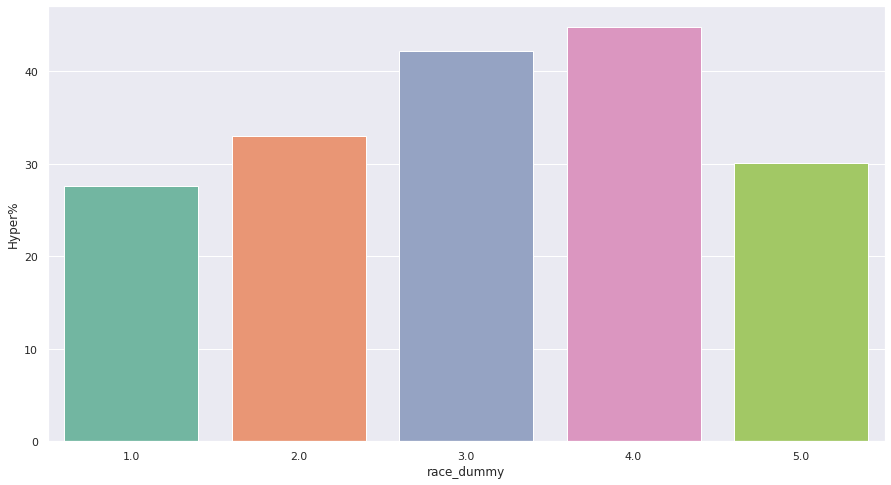

In [ ]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1)
sns.barplot(data=gender_df,x='race_dummy',y='Hyper%',palette="Set2")

In [ ]:

master_race=master_file
master_race.loc[(master_race['race_dummy']==1),'race']="Mexican American"
master_race.loc[(master_race['race_dummy']==2),'race']="Other Hispanic"
master_race.loc[(master_race['race_dummy']==3),'race']="Non-Hispanic White"
master_race.loc[(master_race['race_dummy']==4),'race']="Non-Hispanic Black "
master_race.loc[(master_race['race_dummy']==5),'race']="Other Race - Including Multi-Racial"
race_df=master_race['race'].value_counts()
race_df=race_df.reset_index()
cols=['Race','Count']
race_df.columns=cols
race_df

,Race,Count
0,Non-Hispanic White,14030
1,Non-Hispanic Black,8046
2,Mexican American,5915
3,Other Race - Including Multi-Racial,4070
4,Other Hispanic,3718


In [ ]:
race_sum=sum(race_df['Count'])
race_sum

35779

In [ ]:
race_df['Hyper%']=race_df['Count']/race_sum
race_df

,Race,Count,Hyper%
0,Non-Hispanic White,14030,0.392129
1,Non-Hispanic Black,8046,0.224881
2,Mexican American,5915,0.165320
3,Other Race - Including Multi-Racial,4070,0.113754
4,Other Hispanic,3718,0.103916


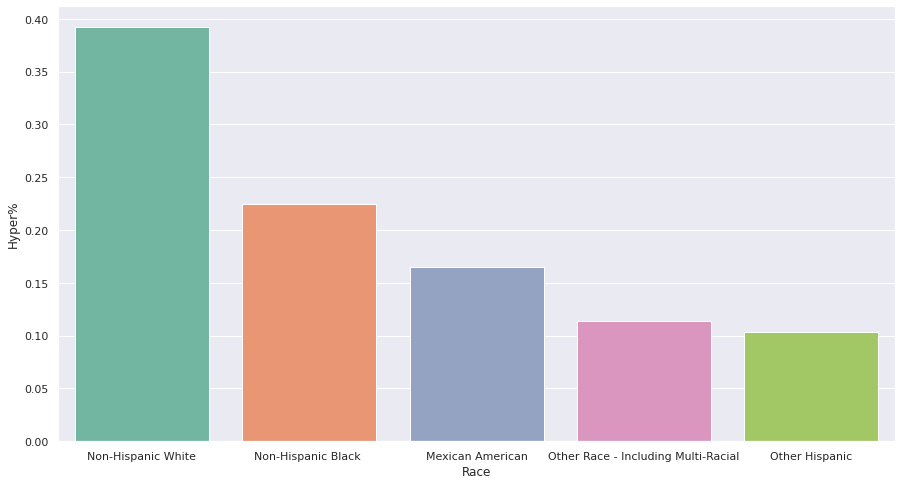

In [ ]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1)
sns.barplot(data=race_df,x='Race',y='Hyper%',palette="Set2")

In [ ]:
master_file['have_diabetes_1_dummy'].value_counts()

2.0    31389
1.0     3648
3.0      693
Name: have_diabetes_1_dummy, dtype: int64